# 地震目录

- 本节贡献者: {{田冬冬}}（作者）、{{姚家园}}（审稿）
- 最近更新日期: 2022-07-31
- 预计花费时间: 90 分钟

---

地震目录中包括了海量地震的信息，而通常用户只需要使用其中的一小部分，因而需要对
地震目录进行筛选。对地震目录进行筛选的准则一般有如下几条：

- 根据地震发震时刻筛选
- 根据震中位置（即震中经纬度）筛选
- 根据震源深度筛选
- 根据地震震级筛选

这一节介绍如何筛选、下载与分析地震目录。

## 在线搜索和查看地震目录

USGS 提供了可用于在线搜索和查看地震目录的网页工具。用户既可以手动筛选和下载
地震目录，也可以方便直观地查看地震分布情况。下面演示如何使用 USGS 网站在线搜索
和查看地震目录。

1. 访问 USGS 地震目录网站: [https://earthquake.usgs.gov/earthquakes/search/](https://earthquake.usgs.gov/earthquakes/search/)，
   会看到如下搜索界面：

   :::{figure} usgs-catalog-1.jpg
   :align: center
   :alt: "USGS 地震目录基本选项"
   :width: 100%
   :::

   搜索界面分为左中右三栏：

   - 左侧栏设置震级搜索范围，可以选择 2.5 级以上或 4.5 级以上地震，也可以自定义
     地震震级最小值和最大值
   - 中间栏设置发震时刻搜索范围，可以选择最近 7 天或最近 30 天，也可以自定义
     发震时刻范围的开始时间和结束时间（UTC 时间）
   - 右侧栏设置震中区域范围，可以选择全球地震、美国及周边地震，也可以在地图上
     选中一个矩形区域

2. 在“高级选项”中可进一步对地震目录做筛选：

   :::{figure} usgs-catalog-2.jpg
   :align: center
   :alt: "USGS 地震目录高级选项"
   :width: 100%
   :::

   - **Geographic Region** 可以设置地震震中的范围，有两种设置方式：
     1. 指定经纬度范围限定一个矩形区域，North 必须大于 South，East 必须大于 West
     2. 指定中心点的经纬度和半径值（单位为 km）来限定一个圆形区域
   - **Depth (km)** 用于限定地震的深度范围，深度单位为 km。
   - **Review Status** 用于限定地震信息的审核状态。一般来说，经人工审核的地震信息
     更加准确，但由于人工审核需要一定的时间，因而最近几小时或几天的地震信息可能
     没有被人工审核过。而自动确定的地震信息实时性更好，但地震位置和震级等信息可能
     不太准确。
   - 除此之外，还可以进一步限制事件类型、事件影响力、地震目录来源、地震信息贡献者以及地震产品
     类型等。读者可以自行探索。

3. 在“输出选项”中可以设置要以什么格式输出地震目录：

   :::{figure} usgs-catalog-3.jpg
   :align: center
   :alt: "USGS 地震目录输出选项"
   :width: 50%
   :::

   USGS 网站支持输出多种格式的地震目录：

   - **Map & List**：在地图中显示地震目录，适合直观地查看地震分布情况
   - **CSV**：CSV 格式，可以用 Excel 打开，也可以用 Python 的 [pandas](https://pandas.pydata.org/)
     模块处理
   - **KML**：Google Earth KML 格式，可以在 Google Earth 中直接打开
   - **QuakeML**: 地震学领域定义的标准地震目录格式，ObsPy 可以直接读取
   - **GeoJSON**: 一种地理空间数据交换格式，多种软件和 Python 模块均可读取

4. 所有选项选择完毕后，点击”Search“按钮，即可以根据指定的格式输出地震目录。

读者可以尝试筛选出 2022 年上半年（1-6 月）全球震级大于 5.0 级、深度大于 70 km 的地震，并选择
以“Map & List”的方式输出。点击“Search”按钮后，会在浏览器中打开在线地图并展示地震分布。
左侧为地震列表，右侧为地震分布。读者可自行探索该界面中的各个按钮，以了解其更多功能。

:::{figure} usgs-catalog-4.jpg
:align: center
:alt: "USGS 地震目录在线地图"
:width: 100%
:::

## 使用 ObsPy 下载地震目录

USGS 提供的在线工具可以很直观地下载地震目录并查看地震分布，但是却不够自动化。
ObsPy 提供了从不同的地震数据中心筛选和下载地震目录的功能，并可以对得到的地震目录进行
进一步分析和处理。

下面演示如何使用 ObsPy 的 {meth}`Client.get_events() <obspy.clients.fdsn.client.Client.get_events()>`
函数筛选和下载地震目录。

首先，需要导入 ObsPy 中地震数据中心数据下载客户端 {class}`~obspy.clients.fdsn.client.Client`:

In [1]:
from obspy.clients.fdsn import Client

接下来，我们需要初始化一个 {class}`~obspy.clients.fdsn.client.Client` 对象。
ObsPy 的 `Client` 支持多个地震数据中心。这里我们选择使用 USGS 地震数据中心：

In [2]:
client = Client("USGS")

{func}`Client.get_events() <obspy.clients.fdsn.client.Client.get_events()>` 函数
可以根据指定的参数对地震目录做筛选并下载。
下面我们将获取 2020 年上半年全球震级大于 5.0 级的地震：

In [3]:
cat = client.get_events(
    starttime="2020-01-01",
    endtime="2020-07-01",
    minmagnitude=5.0
)

{func}`Client.get_events() <obspy.clients.fdsn.client.Client.get_events()>` 函数会根据
指定的参数向 USGS 地震数据中心发起请求，并返回筛选后的地震目录。其返回值是 {class}`~obspy.core.event.Catalog` 类型，
并被保存在变量 `cat` 中。

下面我们看看变量 `cat` 中的内容：
`````{margin}
````{tip}
由于地震数目太多，默认没有打印所有地震的信息。如果想要打印所有地震的信息，可以
使用 `for` 循环语句对变量 `cat` 中的所有事件进行打印：
```python
for event in cat:
    print(event)
```
````
`````

In [4]:
print(cat)

735 Event(s) in Catalog:
2020-06-30T22:10:09.644000Z | -19.543, +169.223 | 5.1  mb | manual
2020-06-30T09:24:23.549000Z | +38.154, -117.958 | 5.0  ml | manual
...
2020-01-01T03:53:29.023000Z | +52.637, +159.161 | 5.0  mb | manual
2020-01-01T00:28:20.289000Z |  -5.324, +152.551 | 5.1  mb | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


从输出中可以看到，该地震目录中包括了 735 个地震，并打印了若干个地震的基本信息。

下面我们进一步限制震源深度最小值为 70 km。加上这一限制后，满足条件的地震只有 140 个。

In [5]:
cat = client.get_events(
    starttime="2020-01-01",
    endtime="2020-07-01",
    minmagnitude=5.0,
    mindepth=70,
)
print(cat)

140 Event(s) in Catalog:
2020-06-30T22:10:09.644000Z | -19.543, +169.223 | 5.1  mb | manual
2020-06-24T15:38:34.463000Z |  -1.602,  -77.527 | 5.1  mww | manual
...
2020-01-04T07:18:18.092000Z | -36.855, +176.951 | 5.1  mww | manual
2020-01-03T15:28:54.137000Z | +11.739,  -86.286 | 5.5  mww | manual
To see all events call 'print(CatalogObject.__str__(print_all=True))'


{class}`~obspy.core.event.Catalog` 类提供了用于绘制地震分布的
{meth}`Catalog.plot() <obspy.core.event.Catalog.plot()>` 函数，
可以直观地查看地震的分布情况。默认情况下，用圆圈表示地震，圆圈的大小代表地震
震级大小，圆圈的颜色代表地震的深度。
````{margin}
```{note}
{meth}`Catalog.plot() <obspy.core.event.Catalog.plot()>` 函数会绘制地震分布图并返回一个
{class}`~matplotlib.figure.Figure` 的实例。
由于 Jupyter Notebook 会自动显示函数的返回值，因而在 Jupyter Notebook 中，地震分布图会绘制两次，
一次由 `cat.plot()` 函数主动绘制，一次由 Jupyter Notebook 显示函数返回值（即 Figure 实例）时绘制。
因而，此处的代码中在 `cat.plot()` 的后面加上了分号 `;`，使得 Jupyter Notebook 不会看到返回的
Figure 实例。
```
````

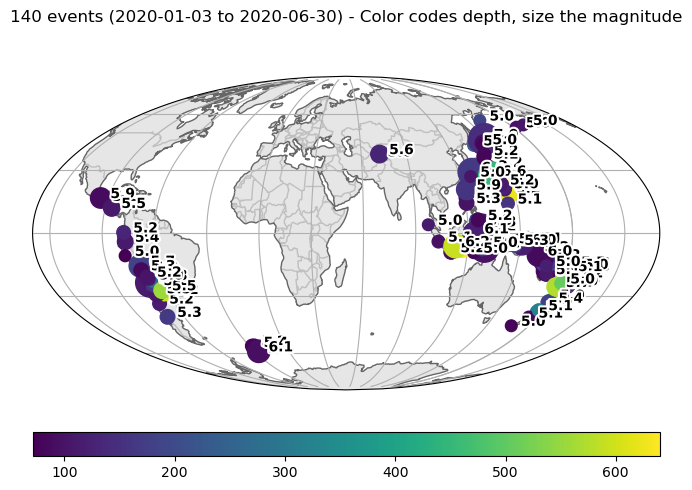

In [6]:
cat.plot();

假如我们只关心日本周边的地震，我们在数据申请时可以进一步限制地震震中的经纬度范围。下面的代码限定了
地震的纬度范围为 30°-45°，经度范围为 130°-145°：

In [7]:
cat = client.get_events(
    starttime="2020-01-01",
    endtime="2020-07-01",
    minmagnitude=5.0,
    mindepth=70,
    minlatitude=30,
    maxlatitude=45,
    minlongitude=130,
    maxlongitude=145,
)
print(cat)

7 Event(s) in Catalog:
2020-05-31T21:02:11.329000Z | +36.203, +140.365 | 5.2  mww | manual
2020-05-30T18:13:48.078000Z | +42.480, +143.809 | 5.6  mww | manual
2020-05-24T09:36:14.771000Z | +31.399, +140.097 | 5.2  mww | manual
2020-05-13T05:56:28.624000Z | +42.742, +139.004 | 5.0  mww | manual
2020-05-05T16:57:08.845000Z | +35.559, +140.055 | 5.1  mww | manual
2020-03-17T15:10:32.414000Z | +42.319, +138.352 | 5.0  mb | manual
2020-02-12T10:37:18.660000Z | +37.322, +141.381 | 5.2  mww | manual


经过这样的筛选之后，满足条件的地震目录只剩下了 9 个。

在绘制下面的地震分布图时，我们使用了 `projection="local"` 参数以绘制区域地图，并使用
`resolution="i"` 参数设置地图中使用的海岸线精度。

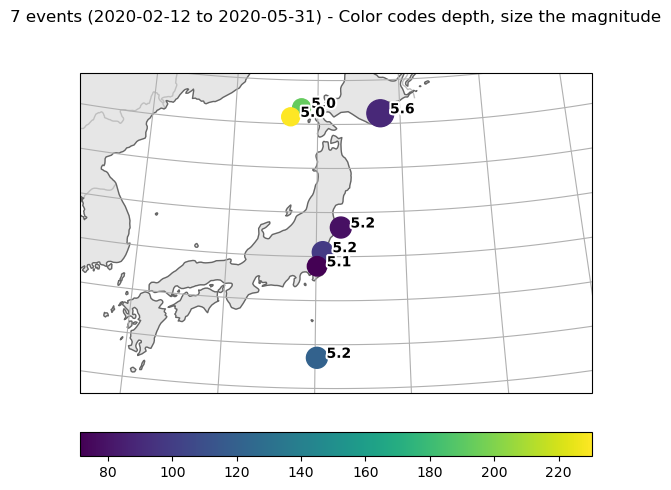

In [8]:
cat.plot(projection="local", resolution="i");

## 地震目录的读与写

通过 {meth}`Client.get_events() <obspy.clients.fdsn.client.Client.get_events()>` 函数
得到的地震目录保存在变量 `cat` 中。当 Python 脚本退出时，所有变量都会被销毁，变量中储存的地震目录信息
也会消失，因而需要及时将地震目录保存起来。

{meth}`Catalog.write() <obspy.core.event.Catalog.write()>` 函数用于将地震目录保存到磁盘文件中。
下面的代码将地震目录以 QuakeML 格式保存到文件 {file}`japan-earthquakes.xml` 中：

In [9]:
cat.write("japan-earthquakes.xml", format="QUAKEML")

/usr/share/miniconda3/envs/seismo-learn/lib/python3.10/site-packages/obspy/io/quakeml/core.py:1112: UserWarning: 'quakeml:earthquake.usgs.gov/fdsnws/event/1/query?starttime=2020-01-01T00%3A00%3A00.000000&endtime=2020-07-01T00%3A00%3A00.000000&minlatitude=30.0&maxlatitude=45.0&minlongitude=130.0&maxlongitude=145.0&mindepth=70.0&minmagnitude=5.0' is not a valid QuakeML URI. It will be in the final file but note that the file will not be a valid QuakeML file.
  warnings.warn(msg % obj.id)


在需要时，随时可以使用 {func}`read_events() <obspy.core.event.read_events>` 函数读入
磁盘文件中的地震目录。该函数值返回 {class}`~obspy.core.event.Catalog` 类型：

In [10]:
from obspy import read_events

cat = read_events("japan-earthquakes.xml")
print(cat)

7 Event(s) in Catalog:
2020-05-31T21:02:11.329000Z | +36.203, +140.365 | 5.2  mww | manual
2020-05-30T18:13:48.078000Z | +42.480, +143.809 | 5.6  mww | manual
2020-05-24T09:36:14.771000Z | +31.399, +140.097 | 5.2  mww | manual
2020-05-13T05:56:28.624000Z | +42.742, +139.004 | 5.0  mww | manual
2020-05-05T16:57:08.845000Z | +35.559, +140.055 | 5.1  mww | manual
2020-03-17T15:10:32.414000Z | +42.319, +138.352 | 5.0  mb | manual
2020-02-12T10:37:18.660000Z | +37.322, +141.381 | 5.2  mww | manual


## 深入理解和使用 {class}`~obspy.core.event.Catalog` 类

上面提到，{meth}`Client.get_events() <obspy.clients.fdsn.client.Client.get_events()>`
和 {func}`read_events() <obspy.core.event.read_events>` 的返回值都是
{class}`~obspy.core.event.Catalog` 类型。

事实上，{class}`~obspy.core.event.Catalog` 类是 ObsPy 中最核心的类之一，用于储存
地震目录信息。下图展示了 {class}`~obspy.core.event.Catalog` 类的属性及其层级关系：

:::{figure} https://docs.obspy.org/_images/Event.png
:align: center
:alt: "ObsPy 的 Catalog 类"
:width: 100%

ObsPy 的{class}`~obspy.core.event.Catalog` 类。引自 [ObsPy 网站](https://docs.obspy.org/_images/Event.png)。
:::

{class}`~obspy.core.event.Catalog` 类可以当作一个列表。
像常规列表一样，我们可以对 {class}`~obspy.core.event.Catalog` 类里的地震事件进行循环：
````{margin}
```{note}
`for event in cat:` 会输出所有地震的信息。为了节省空间，这里只输出了前两个地震的信息。
```
````

In [11]:
for event in cat[0:2]:
    print(event)

Event:	2020-05-31T21:02:11.329000Z | +36.203, +140.365 | 5.2  mww | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000a3az&format=quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000))
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml#magnitude")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements
Event:	2020-05-30T18:13:48.078000Z | +42.480, +143.809 | 5.6  mww | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000a2rt&format=quakeml")
	       

{class}`~obspy.core.event.Catalog` 列表里的每个元素都是 {class}`~obspy.core.event.Event` 类型。
下面以第一个事件为例，看看 {class}`~obspy.core.event.Event` 类里的内容：

In [12]:
event = cat[0]
print(event)

Event:	2020-05-31T21:02:11.329000Z | +36.203, +140.365 | 5.2  mww | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000a3az&format=quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000))
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml#magnitude")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


从中可以看出，{class}`~obspy.core.event.Event` 类有很多属性。在这一节里，
我们重点关注 `origins` 和 `magnitudes`。

{class}`~obspy.core.event.Event` 的 `origins` 属性也是一个列表，其元素是 {class}`~obspy.core.event.origin.Origin` 类型。

In [13]:
print(event.origins)

[Origin(resource_id=ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml"), time=UTCDateTime(2020, 5, 31, 21, 2, 11, 329000), longitude=140.3648, latitude=36.2034, depth=98610.0 [uncertainty=3700.0], quality=OriginQuality(used_phase_count=135, standard_error=0.7, azimuthal_gap=52.0, minimum_distance=0.143), origin_uncertainty=OriginUncertainty(horizontal_uncertainty=5800.0, preferred_description='horizontal uncertainty'), evaluation_mode='manual', creation_info=CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000)))]


`event.origins` 之所以是一个列表，是因为，对于任意一个地震，可能有多个机构或多种不同方法给出多个不同的震源信息。
在这个例子中，`event.origins` 中只包含了一个元素（即一个震源信息）。

In [14]:
origin = event.origins[0]
print(origin)

Origin
	        resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml")
	               time: UTCDateTime(2020, 5, 31, 21, 2, 11, 329000)
	          longitude: 140.3648
	           latitude: 36.2034
	              depth: 98610.0 [uncertainty=3700.0]
	            quality: OriginQuality(used_phase_count=135, standard_error=0.7, azimuthal_gap=52.0, minimum_distance=0.143)
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=5800.0, preferred_description='horizontal uncertainty')
	    evaluation_mode: 'manual'
	      creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000))


从上面的输出中可以看到，{class}`~obspy.core.event.origin.Origin` 类的属性中包含了我们关心的震源
信息。比如，可以通过下面的代码，输出地震震源的发震时刻、纬度、经度和深度信息：
````{margin}
```{note}
ObsPy 中震源深度的单位为 m，而有些地震目录中深度的单位为 km。在使用时需要格外注意。
```
````

In [15]:
print(origin.time, origin.latitude, origin.longitude, origin.depth)

2020-05-31T21:02:11.329000Z 36.2034 140.3648 98610.0


同样的，{class}`~obspy.core.event.Event` 的 `magnitudes` 属性也是一个列表，
其元素是 {class}`~obspy.core.event.magnitude.Magnitude` 类型。

In [16]:
print(event.magnitudes)

[Magnitude(resource_id=ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml#magnitude"), mag=5.2 [uncertainty=0.062], magnitude_type='mww', origin_id=ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml"), station_count=25, evaluation_mode='manual', creation_info=CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000)))]


In [17]:
mag = event.magnitudes[0]
print(mag)

Magnitude
	     resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml#magnitude")
	             mag: 5.2 [uncertainty=0.062]
	  magnitude_type: 'mww'
	       origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000a3az/us/1597522798040/product.xml")
	   station_count: 25
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2020, 8, 15, 20, 19, 58, 40000))


下面的代码将输出地震震级和震级类型信息：

In [18]:
print(mag.mag, mag.magnitude_type)

5.2 mww
